In [2]:
#用faker库,构建一个数据集，如果没有，需要提前安装 pip install Faker
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

df = pd.DataFrame({
    'uid':[str(fake.random_int(10000, 10012)) for i in range(0,12)],
    'ip':[fake.ipv4() for i in range(0,4)]*3
     })
df


#对数据进行聚合
df = df.groupby(['uid','ip']).agg({'ip': ['count']}).reset_index()
print('聚合数据:\n',df)



# 可视化我们的数据集
import networkx as nx
import matplotlib.pyplot as plt

聚合数据:
      uid             ip      
                        count
0  10000    131.7.10.83     1
1  10001   78.4.158.180     1
2  10002   82.55.203.34     3
3  10003  63.74.101.137     1
4  10005  63.74.101.137     1
5  10006  63.74.101.137     1
6  10007   78.4.158.180     1
7  10008   78.4.158.180     1
8  10011    131.7.10.83     1
9  10012    131.7.10.83     1


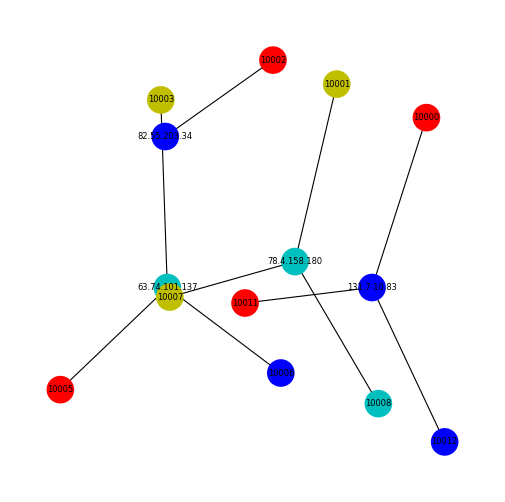

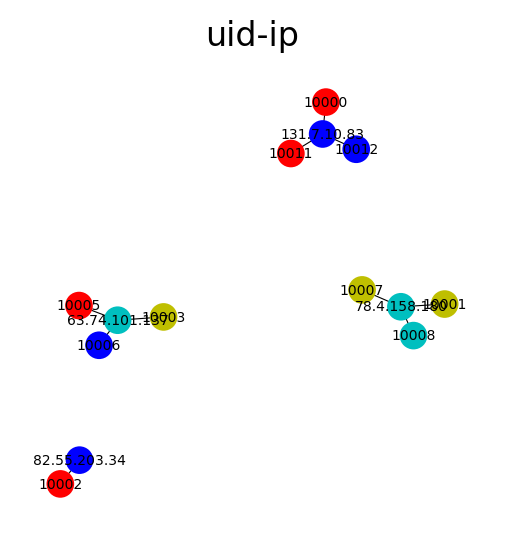

[{'10000', '10012', '10011', '131.7.10.83'}, {'10001', '78.4.158.180', '10008', '10007'}, {'10002', '82.55.203.34'}, {'10003', '10006', '63.74.101.137', '10005'}]


,user_id
group_id,
0,4
1,4
3,4
2,2


In [3]:

# 可视化我们的数据集
da = df.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

#显示该graph-kamada_kawai_layout
colors = ['r','b','y','c']*6
colors = colors[0:len(G.nodes())]

plt.figure(figsize=(3,3),dpi=200)
nx.draw_networkx(G,
                 pos = nx.kamada_kawai_layout(G),
                 node_color = colors,
                 node_size=80,
                 font_size=3,
                 alpha=1,
                 width=0.4
                 )
#plt.title("kamada_kawai_layout")
plt.axis('off')
plt.show()


#显示该graph - spring_layout
plt.figure(figsize=(3,3),dpi=200)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=80,
                 font_size=5,
                 alpha=1.0,
                 width=0.4
                 )
plt.axis('off')
plt.title("uid-ip")
plt.show()



# 找到所有连通子图
com = list(nx.connected_components(G))

# 打印看看什么格式的，可以看到得到的结果为列表-字典格式
print(com)

# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'user_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com

# 统计每个群组人数
df_com.groupby('group_id').count().sort_values(by='user_id', ascending=False) 

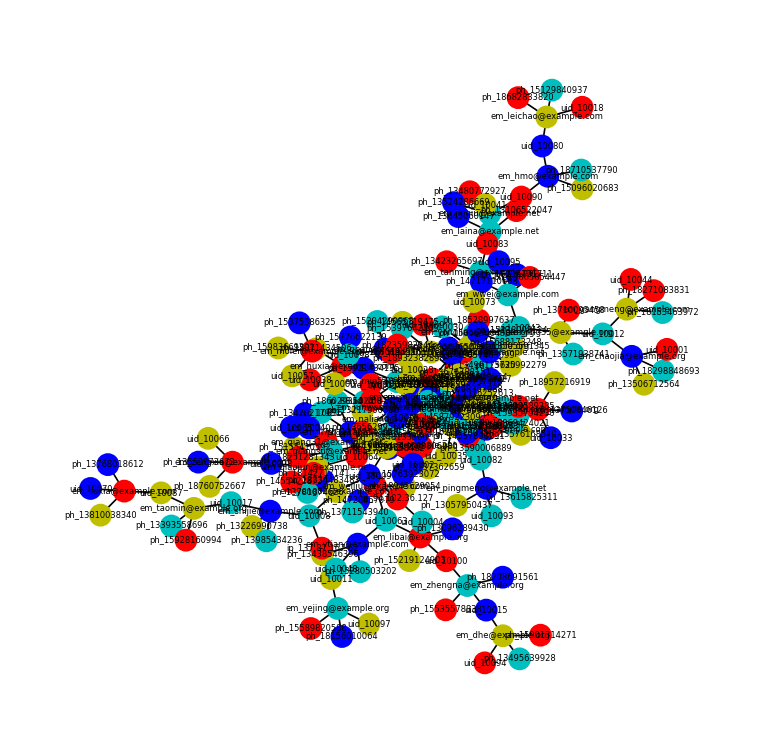

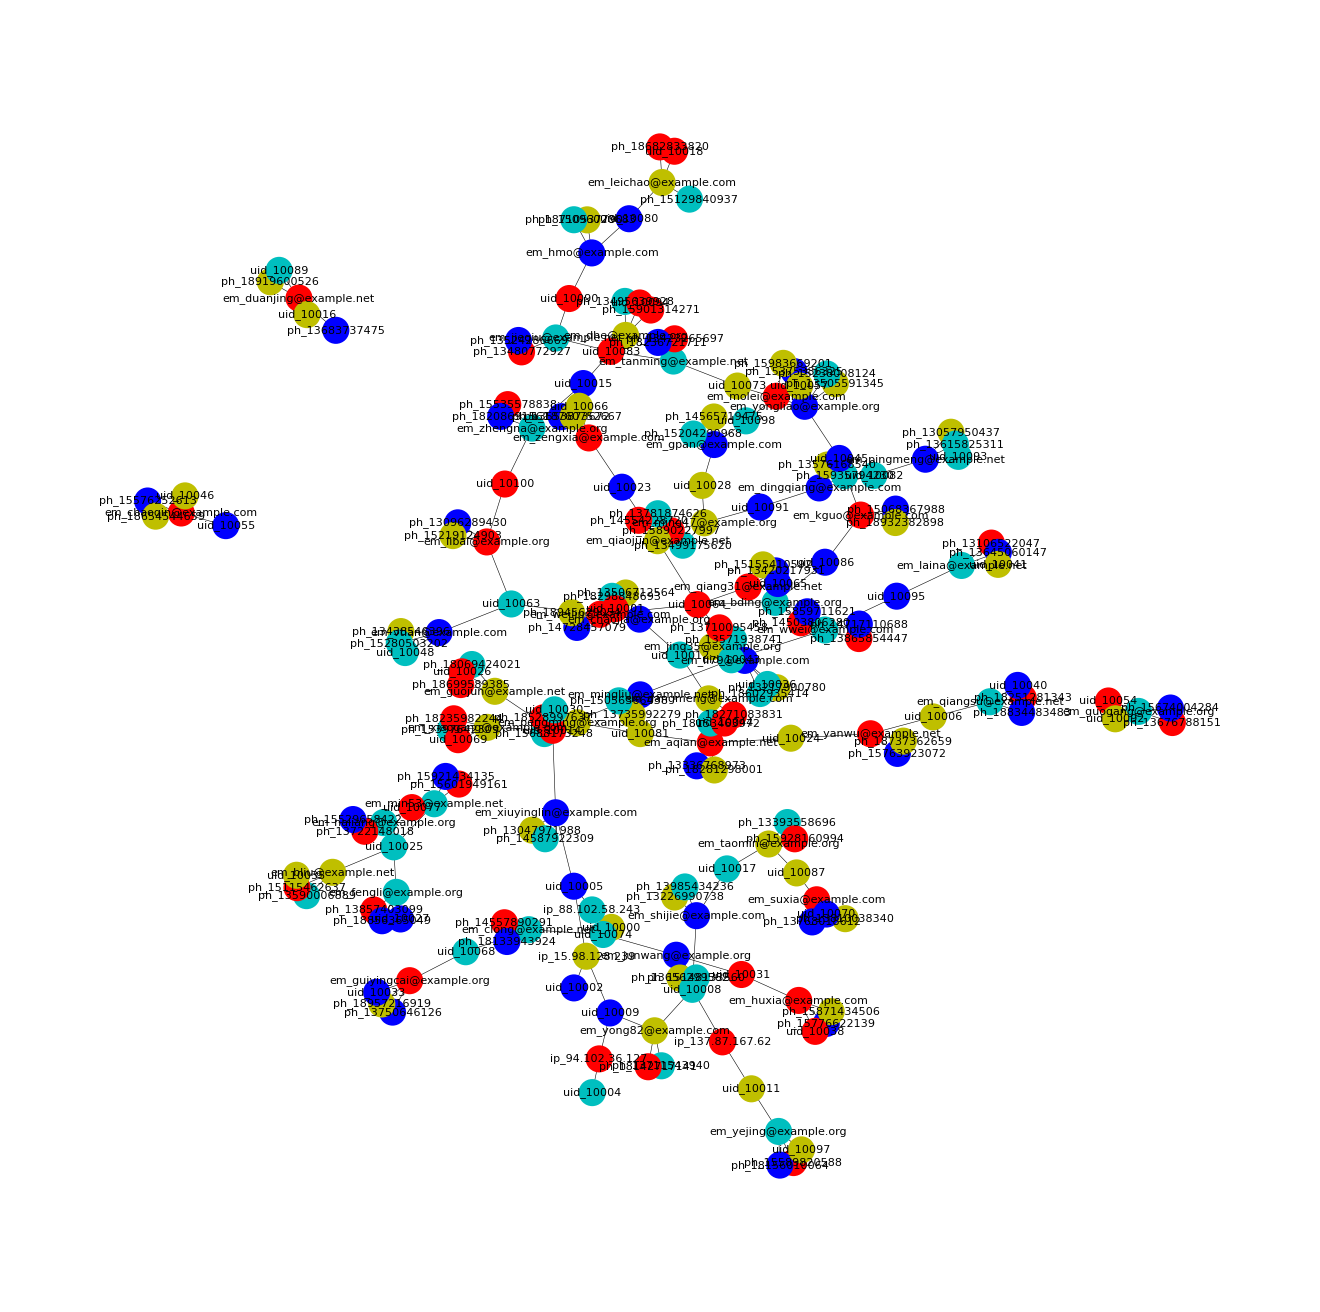

[{'em_yanwu@example.net', 'ph_18251281343', 'uid_10030', 'ph_18528997637', 'ph_15763923072', 'uid_10081', 'ph_18834483483', 'ph_18281298001', 'em_aqian@example.net', 'ph_15688173248', 'uid_10006', 'em_qiangsu@example.net', 'em_pengming@example.org', 'uid_10040', 'uid_10024', 'ph_13336768973', 'ph_18737362659'}, {'ph_18208691561', 'ph_18602935414', 'em_leichao@example.com', 'ph_18932382898', 'ph_14554228720', 'ph_13096289430', 'em_bding@example.org', 'uid_10086', 'uid_10065', 'em_yongliao@example.org', 'uid_10023', 'em_qiang31@example.net', 'ph_13438546396', 'ph_15859711621', 'ph_13505591345', 'ph_13553873672', 'uid_10015', 'ph_13480772927', 'ph_15280503202', 'ph_14503806280', 'em_tanming@example.net', 'em_li79@example.com', 'em_weiliu@example.com', 'em_dhe@example.org', 'uid_10064', 'ph_13217900780', 'em_zengxia@example.com', 'em_hmo@example.com', 'em_zhengna@example.org', 'ph_18710537790', 'em_vtian@example.com', 'uid_10036', 'em_jieqiu@example.net', 'uid_10066', 'uid_10073', 'ph_1509

,group_id,type,object_id
0,0,em,yanwu@example.net
1,0,ph,18251281343
2,0,uid,10030
3,0,ph,18528997637
4,0,ph,15763923072
5,0,uid,10081
6,0,ph,18834483483
7,0,ph,18281298001
8,0,em,aqian@example.net
9,0,ph,15688173248


In [4]:
#用faker库,构建一个数据集，如果没有，需要提前安装 pip install Faker
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

# 我们构建三个关系，4个节点的异构图
uid = ['uid_'+str(fake.random_int(10000, 10012)) for i in range(0,12)]
ip = ['ip_'+fake.ipv4() for i in range(0,4)]*3

uid1  = ['uid_'+str(fake.random_int(10000, 10100)) for i in range(0,100)]
email = ['em_'+fake.email() for i in range(0,50)]*2
phone = ['ph_'+fake.phone_number() for i in range(0,100)]*1


df1 = pd.DataFrame({
    'sr':uid,
    'ds':ip
})


df2 = pd.DataFrame({
    'sr':uid1,
    'ds':email
     })


df3 = pd.DataFrame({
    'sr':email,
    'ds':phone
     })



# 四个节点、三种关系合并
df = pd.concat([df1,df2,df3])


# 对数据进行聚合
df = df.groupby(['sr','ds']).agg({'ds': ['count']}).reset_index()



# 可视化看看这个图长啥样
da = df.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

#显示该graph-kamada_kawai_layout
colors = ['r','b','y','c']*80
colors = colors[0:len(G.nodes())]

plt.figure(figsize=(3,3),dpi=300)
nx.draw_networkx(G,
                 pos = nx.kamada_kawai_layout(G),
                 node_color = colors,
                 node_size=20,
                 font_size=2,
                 alpha=1,
                 width=0.4
                 )
#plt.title("kamada_kawai_layout")
plt.axis('off')
plt.show()


#显示该graph - spring_layout
plt.figure(figsize=(4,4),dpi=400)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=15,
                 font_size=2,
                 alpha=1.0,
                 width=0.1
                 )
plt.axis('off')
#plt.title("spring_layout")
plt.show()


# 找到所有连通子图
com = list(nx.connected_components(G))

# 打印看看什么格式的，可以看到得到的结果为列表-字典格式
print(com)

# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com

# 统计每个团伙人数 并降序
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False) 


#拆分出来团伙中对象的类型
df_com['type']      = df_com['object_id'].apply(lambda x:x.split('_')[0])
df_com['object_id'] = df_com['object_id'].apply(lambda x:x.split('_')[1])

#整理下格式
df_com = df_com[['group_id','type','object_id']]

#查看团伙的细节
df_com

# 找一个团伙看看里面的细节
df_com[df_com['group_id']==0]
